In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

car_df = pd.read_csv("carbig.csv")
car_df = car_df.dropna()
display(car_df)

,Model,Origin,Model_Year,Weight,when,Acceleration,cyl4,Cylinders,Displacement,Horsepower,Mfg,MPG,org
0,chevrolet chevelle malibu,USA,70,3504,Early,12.0,Other,8,307.0,130.0,chevrolet,18.0,USA
1,buick skylark 320,USA,70,3693,Early,11.5,Other,8,350.0,165.0,buick,15.0,USA
2,plymouth satellite,USA,70,3436,Early,11.0,Other,8,318.0,150.0,plymouth,18.0,USA
3,amc rebel sst,USA,70,3433,Early,12.0,Other,8,304.0,150.0,amc,16.0,USA
4,ford torino,USA,70,3449,Early,10.5,Other,8,302.0,140.0,ford,17.0,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,USA,82,2790,Late,15.6,Four,4,140.0,86.0,ford,27.0,USA
402,volkswagen pickup,Germany,82,2130,Late,24.6,Four,4,97.0,52.0,volkswagen,44.0,Europe
403,dodge rampage,USA,82,2295,Late,11.6,Four,4,135.0,84.0,dodge,32.0,USA
404,ford ranger,USA,82,2625,Late,18.6,Four,4,120.0,79.0,ford,28.0,USA


In [2]:
o_mpg = car_df.sort_values(by=['Origin','MPG'])
origins = o_mpg[['Origin','MPG']].Origin.unique()
print(origins)

['England' 'France ' 'Germany' 'Italy  ' 'Japan  ' 'Sweden ' 'USA    ']


c:\users\wiktor\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


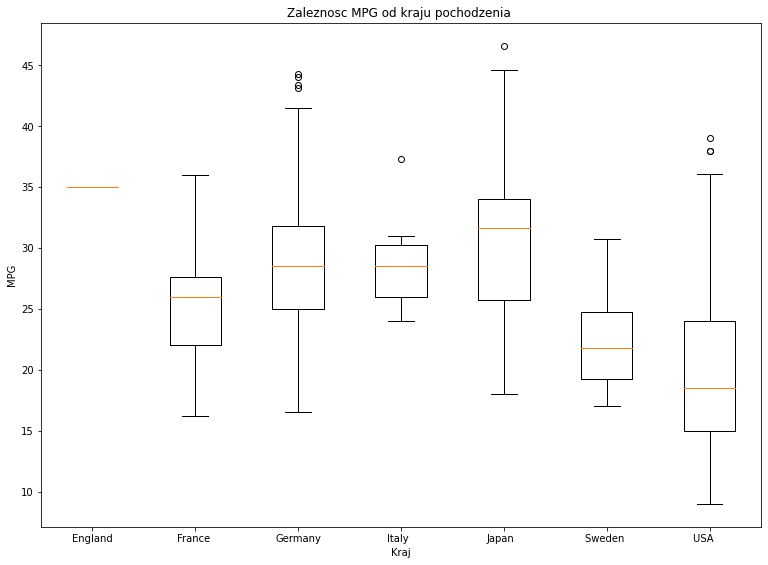

In [3]:
data = [car_df[car_df.Origin == o]['MPG'] for o in origins]



fig = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
bp = ax.boxplot(data,labels=origins)
   
plt.title('Zaleznosc MPG od kraju pochodzenia ')
ax.set_xlabel('Kraj')
ax.set_ylabel('MPG')
plt.show()
plt.savefig('origin_mpg.png')

In [4]:
car_df[['Acceleration','Cylinders']]

,Acceleration,Cylinders
0,12.0,8
1,11.5,8
2,11.0,8
3,12.0,8
4,10.5,8
...,...,...
401,15.6,4
402,24.6,4
403,11.6,4
404,18.6,4


<Figure size 432x288 with 0 Axes>

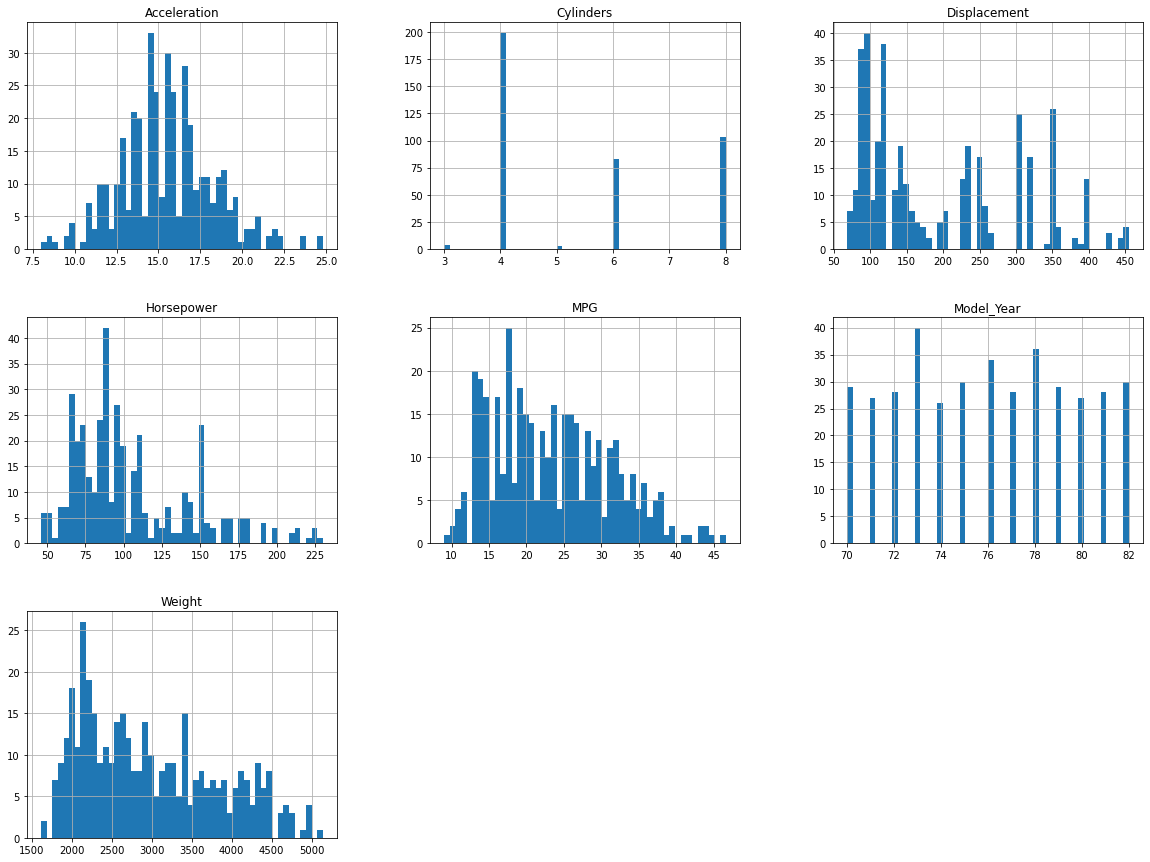

<Figure size 432x288 with 0 Axes>

In [5]:
car_df.hist(bins=50, figsize=(20,15))
plt.show()
plt.savefig('car_df_histogram.png')

In [6]:
corr_matrix = car_df.corr()
corr_matrix['Cylinders']



Model_Year     -0.345647
Weight          0.897527
Acceleration   -0.504683
Cylinders       1.000000
Displacement    0.950823
Horsepower      0.842983
MPG            -0.777618
Name: Cylinders, dtype: float64

In [7]:
print(car_df['Mfg'].unique())
print(len(car_df['Mfg'].unique()))

['chevrolet    ' 'buick        ' 'plymouth     ' 'amc          '
 'ford         ' 'pontiac      ' 'dodge        ' 'toyota       '
 'datsun       ' 'volkswagen   ' 'peugeot      ' 'audi         '
 'saab         ' 'bmw          ' 'ih           ' 'mercury      '
 'opel         ' 'fiat         ' 'oldsmobile   ' 'chrysler     '
 'mazda        ' 'volvo        ' 'renault      ' 'honda        '
 'subaru       ' 'mercedes-benz' 'cadillac     ' 'triumph      '
 'nissan       ']
29


No handles with labels found to put in legend.


Checking mfg: ford         


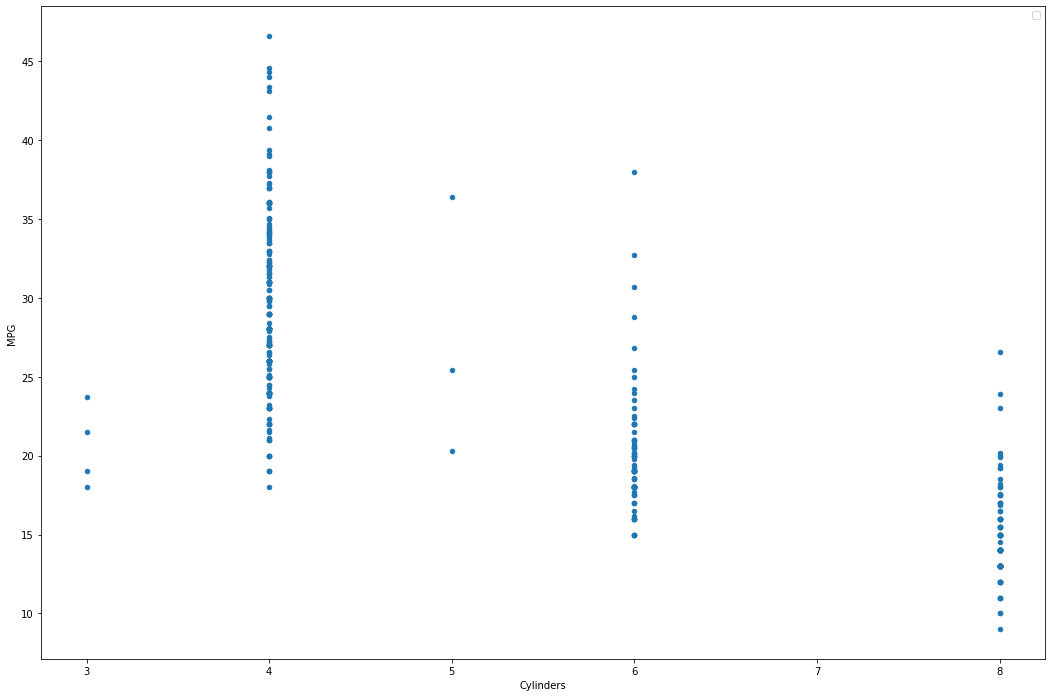

In [8]:
from pandas.plotting import scatter_matrix

manufacturers = car_df['Mfg'].unique()

manufacturer = manufacturers[4]

print(f"Checking mfg: {manufacturer}")

attributes = ["MPG", "Cylinders"]
#scatter_matrix(car_df[attributes], figsize=(18, 12))

car_df.plot(kind="scatter", x="Cylinders", y="MPG", figsize=(18, 12))

plt.legend()

c:\users\wiktor\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


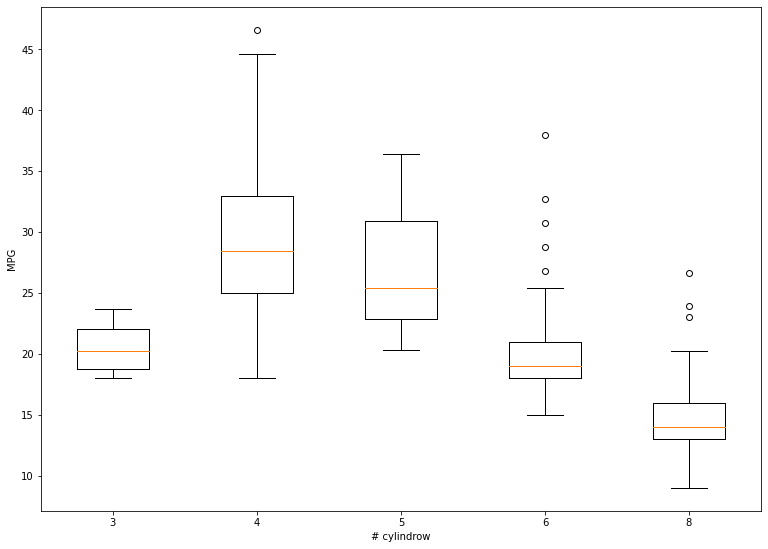

In [9]:
num_cylinders = car_df.sort_values(by=['Cylinders']).Cylinders.unique()

data = [car_df[car_df.Cylinders == n]['MPG'] for n in num_cylinders]



fig = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
bp = ax.boxplot(data,labels=num_cylinders)
   
ax.set_xlabel('# cylindrow')
ax.set_ylabel('MPG')
plt.show()

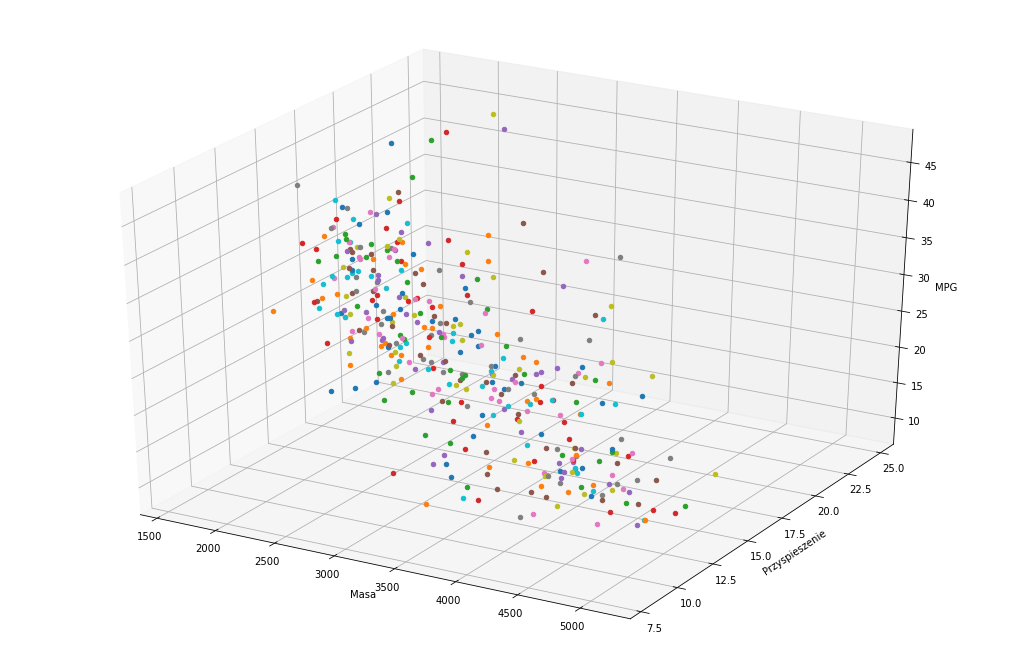

In [10]:
sub_df = car_df[['Weight','Acceleration','MPG']]

fig = plt.figure(figsize =(18, 12))
ax = fig.add_subplot(projection='3d')

for i, row in sub_df.iterrows():
    ax.scatter(row['Weight'], row['Acceleration'], row['MPG'])

ax.set_xlabel('Masa')
ax.set_ylabel('Przyspieszenie')
ax.set_zlabel('MPG')


plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CF094F58B0>,
      dtype=object)

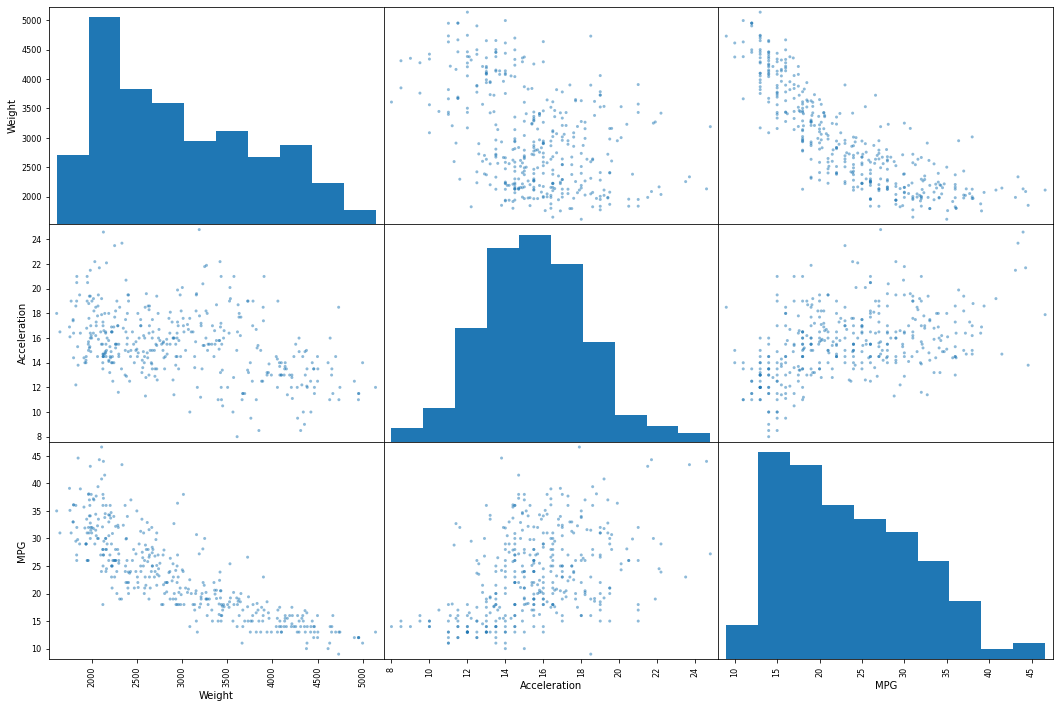

In [11]:
from pandas.plotting import scatter_matrix


attributes = ['Weight','Acceleration','MPG']
scatter_matrix(car_df[attributes], figsize=(18, 12))

c:\users\wiktor\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


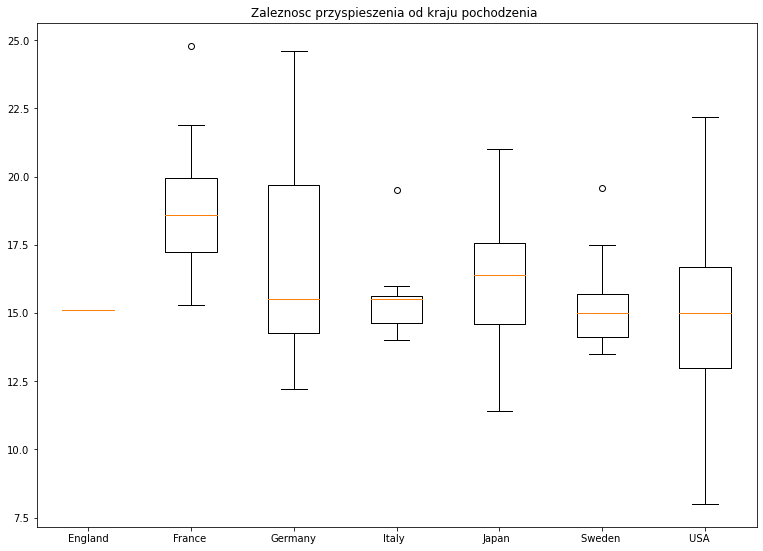

Text(3.200000000000003, 0.5, 'Przyspieszenie')

In [12]:
'''
Wskazać 
który kraj produkuje samochody z najlepszym przyspieszeniem, 
który najlżejsze, 
który najoszczędniejsze, 
który najmocniejsze. 
Wizualizacja w postaci wykresów pudełkowych, z medianą.
'''

# przyspieszenie

data = [car_df[car_df.Origin == o]['Acceleration'] for o in origins]


fig = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
bp = ax.boxplot(data,labels=origins)
   
plt.title('Zaleznosc przyspieszenia od kraju pochodzenia ')
plt.show()
ax.set_xlabel('Kraj')
ax.set_ylabel('Przyspieszenie')

c:\users\wiktor\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


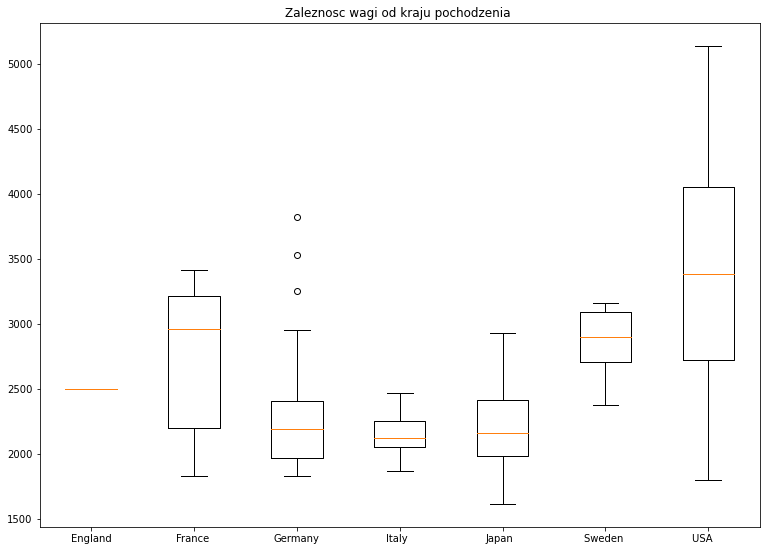

Text(3.1999999999999957, 0.5, 'Waga')

In [13]:
# waga

data = [car_df[car_df.Origin == o]['Weight'] for o in origins]


fig = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
bp = ax.boxplot(data,labels=origins)
   
plt.title('Zaleznosc wagi od kraju pochodzenia ')
plt.show()
ax.set_xlabel('Kraj')
ax.set_ylabel('Waga')

c:\users\wiktor\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


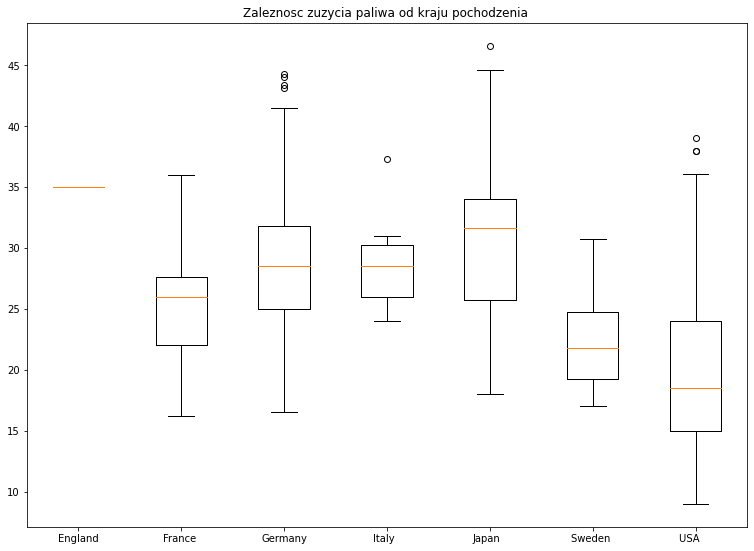

Text(3.1999999999999993, 0.5, 'Zużycie paliwa')

In [14]:
# spalanie

data = [car_df[car_df.Origin == o]['MPG'] for o in origins]


fig = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
bp = ax.boxplot(data,labels=origins)
   
plt.title('Zaleznosc zuzycia paliwa od kraju pochodzenia ')
plt.show()
ax.set_xlabel('Kraj')
ax.set_ylabel('Zużycie paliwa')

c:\users\wiktor\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


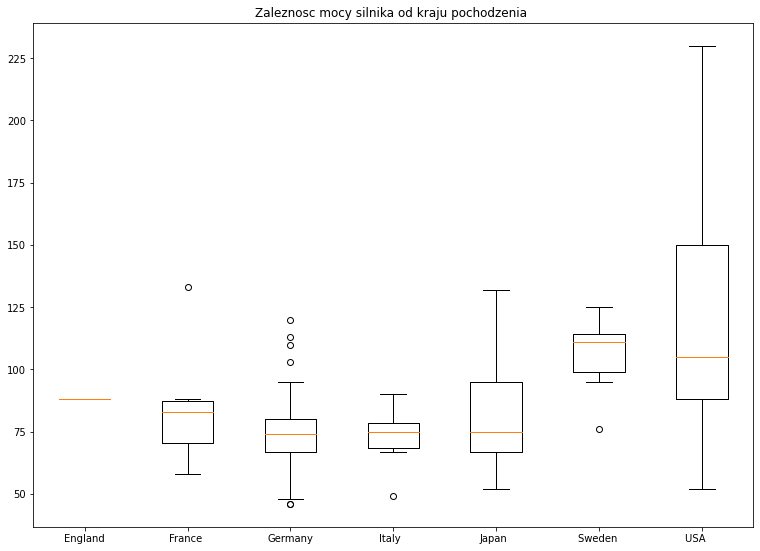

Text(3.1999999999999957, 0.5, 'Liczba koni mechanicznych')

In [15]:
# moc

data = [car_df[car_df.Origin == o]['Horsepower'] for o in origins]


fig = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
bp = ax.boxplot(data,labels=origins)
   
plt.title('Zaleznosc mocy silnika od kraju pochodzenia ')
plt.show()
ax.set_xlabel('Kraj')
ax.set_ylabel('Liczba koni mechanicznych')